In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_columns = None
import geopandas as gpd
import geoplot as gp
import plotly.figure_factory as ff



Introduction

Hello reader, my goal in this study is to analyze the variables that either contribute or correlate with a specific Youtuber around their success in 2023, specifically in their subscribers and earnings. The goal is to understand which variables are most influential on success for a Youtuber, in which at the same time we must figure out how to measure success.

The main variables I'll be analyzing are Category, Enrollment %, Country, Population, Uploads, and Video Views. I chose these because they can have varying degrees of impact depending on the type of viewer and for their purpose.

Although these there are many factors that can contribute to a Youtubers success that we may not understand yet, we will figure out how to measure success and look to predict future success with the information available.

HERE IS MY GITHUB FOR CODE.

Data

I used a dataset from Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

In [14]:
rawdf = pd.read_csv('Global_YouTube_Statistics.csv',encoding ='latin-1')

In [45]:
rawdf.head(6)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN


From playing around in the dataset, I saw that there were certain Youtuber's that were errors, you can see here as 'Music' at rank 6 is not a Youtuber, but possibly just a bug in reading a category of music.

To single these out, I searched for video views less than 1, and it is pretty clear that these are errors since they have large amounts of subscribers with no earnings estimates or video views, with many NaN values

In [16]:
df = rawdf.drop(rawdf[rawdf['video views'] < 1].index)

In [21]:
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


After further exploration, we can see that channel_type and category are different.

In [22]:
df.category.unique()

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       nan, 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [23]:
df.channel_type.unique()

array(['Music', 'Entertainment', 'Education', 'People', 'Sports', 'Film',
       'News', nan, 'Games', 'Comedy', 'Howto', 'Nonprofit', 'Autos',
       'Tech', 'Animals'], dtype=object)

From a bit of research, I found that the category selection seemed to be more in-line with the native YouTube categories. I will clean the category section since there was also some NaNs or incomplete values. For any NaNs on the category part I will input the corresponding channel_type if needed.

In [25]:
def cat_cleaner(string):
    if string == 'Animals': 
        return 'Pets & Animals'
    elif string == 'Autos': 
        return 'Autos & Vehicles'
    elif string == 'Film': 
        return 'Film & Animation'
    elif string == 'Games': 
        return 'Gaming'
    elif string == 'Howto': 
        return 'Howto & Style'
    elif string == 'News': 
        return 'News & Politics'
    elif string == 'Nonprofit': 
        return 'Nonprofits & Activism'
    elif string == 'People': 
        return 'People & Blogs'
    elif string == 'Tech': 
        return 'Science & Technology'
    else:
        return string 

In [26]:
for index, row in df.iterrows():
    if df.category.isnull()[index]:
        df.category[index] = cat_cleaner(df.channel_type[index])

In [81]:
#adjusting a few specific cases I saw in the top few records
df[df.Youtuber == 'Busy Fun Ltd']['category'].index
df.at[445, 'category'] = 'Comedy'
df[df.Youtuber == 'KL BRO Biju Rithvik'].Country.index
df.at[302, 'Country'] = 'India'

Now that we've cleaned a bit of the data, it would be interesting to see if the top 10 in subscribers are the same or very similiar to the top 10 in highest_yearly_earnings. Or if there seems to be other variables that play a larger part.

In [106]:
top10_subscribership = df[['Youtuber','subscribers','Country']].sort_values(by=['subscribers'],ascending=False).head(10)
top10_subscribership

,Youtuber,subscribers,Country
0,T-Series,245000000.0,India
2,MrBeast,166000000.0,United States
3,Cocomelon - Nursery Rhymes,162000000.0,United States
4,SET India,159000000.0,India
6,ýýý Kids Diana Show,112000000.0,United States
7,PewDiePie,111000000.0,Japan
8,Like Nastya,106000000.0,Russia
9,Vlad and Niki,98900000.0,United States
10,Zee Music Company,96700000.0,India
11,WWE,96000000.0,United States


In [83]:
top10_earnings = df[['Youtuber','highest_yearly_earnings','Country']].sort_values(by=['highest_yearly_earnings'],ascending=False).head(10)
top10_earnings

,Youtuber,highest_yearly_earnings,Country
495,ýýýýýýýýý KIMPRO,163400000.0,South Korea
417,DaFuq!?Boom!,110600000.0,United States
0,T-Series,108400000.0,India
302,KL BRO Biju Rithvik,97600000.0,India
3,Cocomelon - Nursery Rhymes,94800000.0,United States
4,SET India,87500000.0,India
21,Zee TV,81900000.0,India
139,StarPlus,80000000.0,India
15,Sony SAB,79600000.0,India
83,GR6 EXPLODE,78500000.0,Brazil


Just being from the US, I expected MrBeast to be in the top expected earners, however from this data that shows to not be true. Perhaps there is more money to be made in other countries?

It looks like US dominates the subscribers top 10, however India dominates the exp earnings top 10

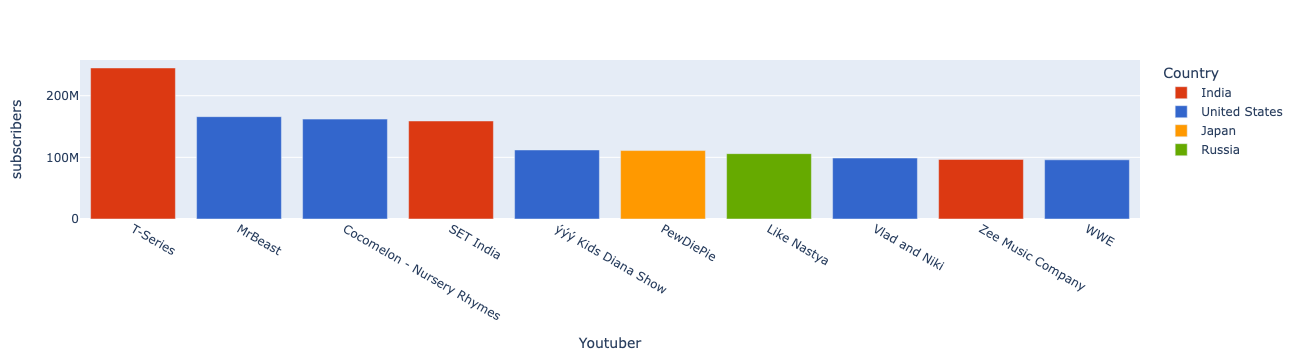

In [158]:
fig = px.bar(top10_subscribership,x='Youtuber',y='subscribers', color='Country', color_discrete_map={"India": '#DC3912', 'United States': '#3366CC', 'Japan': '#FF9900', 'Russia': '#66AA00'})
fig.update_layout(xaxis_categoryorder = 'total descending')

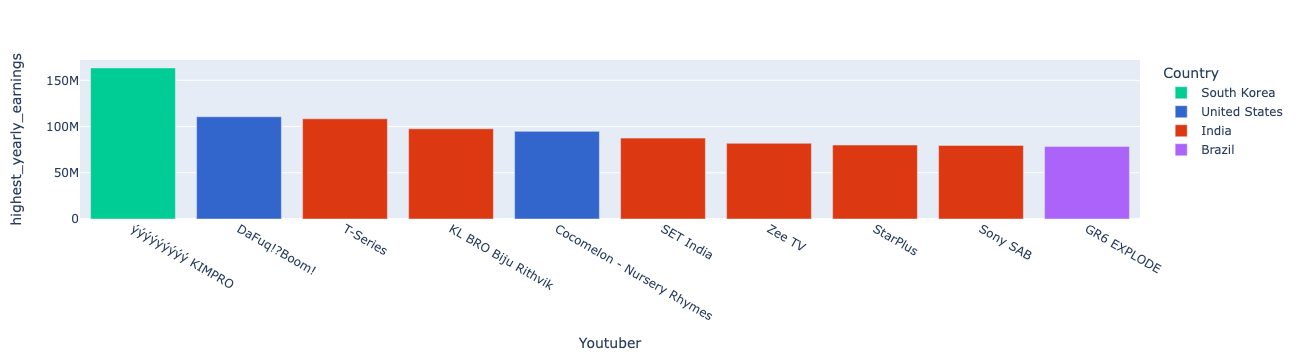

In [159]:
fig2 = px.bar(top10_earnings,x='Youtuber',y='highest_yearly_earnings', color = 'Country', color_discrete_map={"India": '#DC3912', 'United States': '#3366CC'})
fig2.update_layout(xaxis_categoryorder = 'total descending')
fig2

This leads us to the point that it isn't all about subscribers if you are looking to make the highest earnings, there can be other variables that influence such as location. Although the US makes up 50% of the Youtubers in the top 10 subscribed, they only make up for 20% of the top 10 earners.

South Korea has the top Youtuber in earnings but none in the top subscribers. 
India has only 30% of top subscribers but 60% of the top earners.

Begs to ask the question, what are the main factors in both subscribership & est. highest earnings?


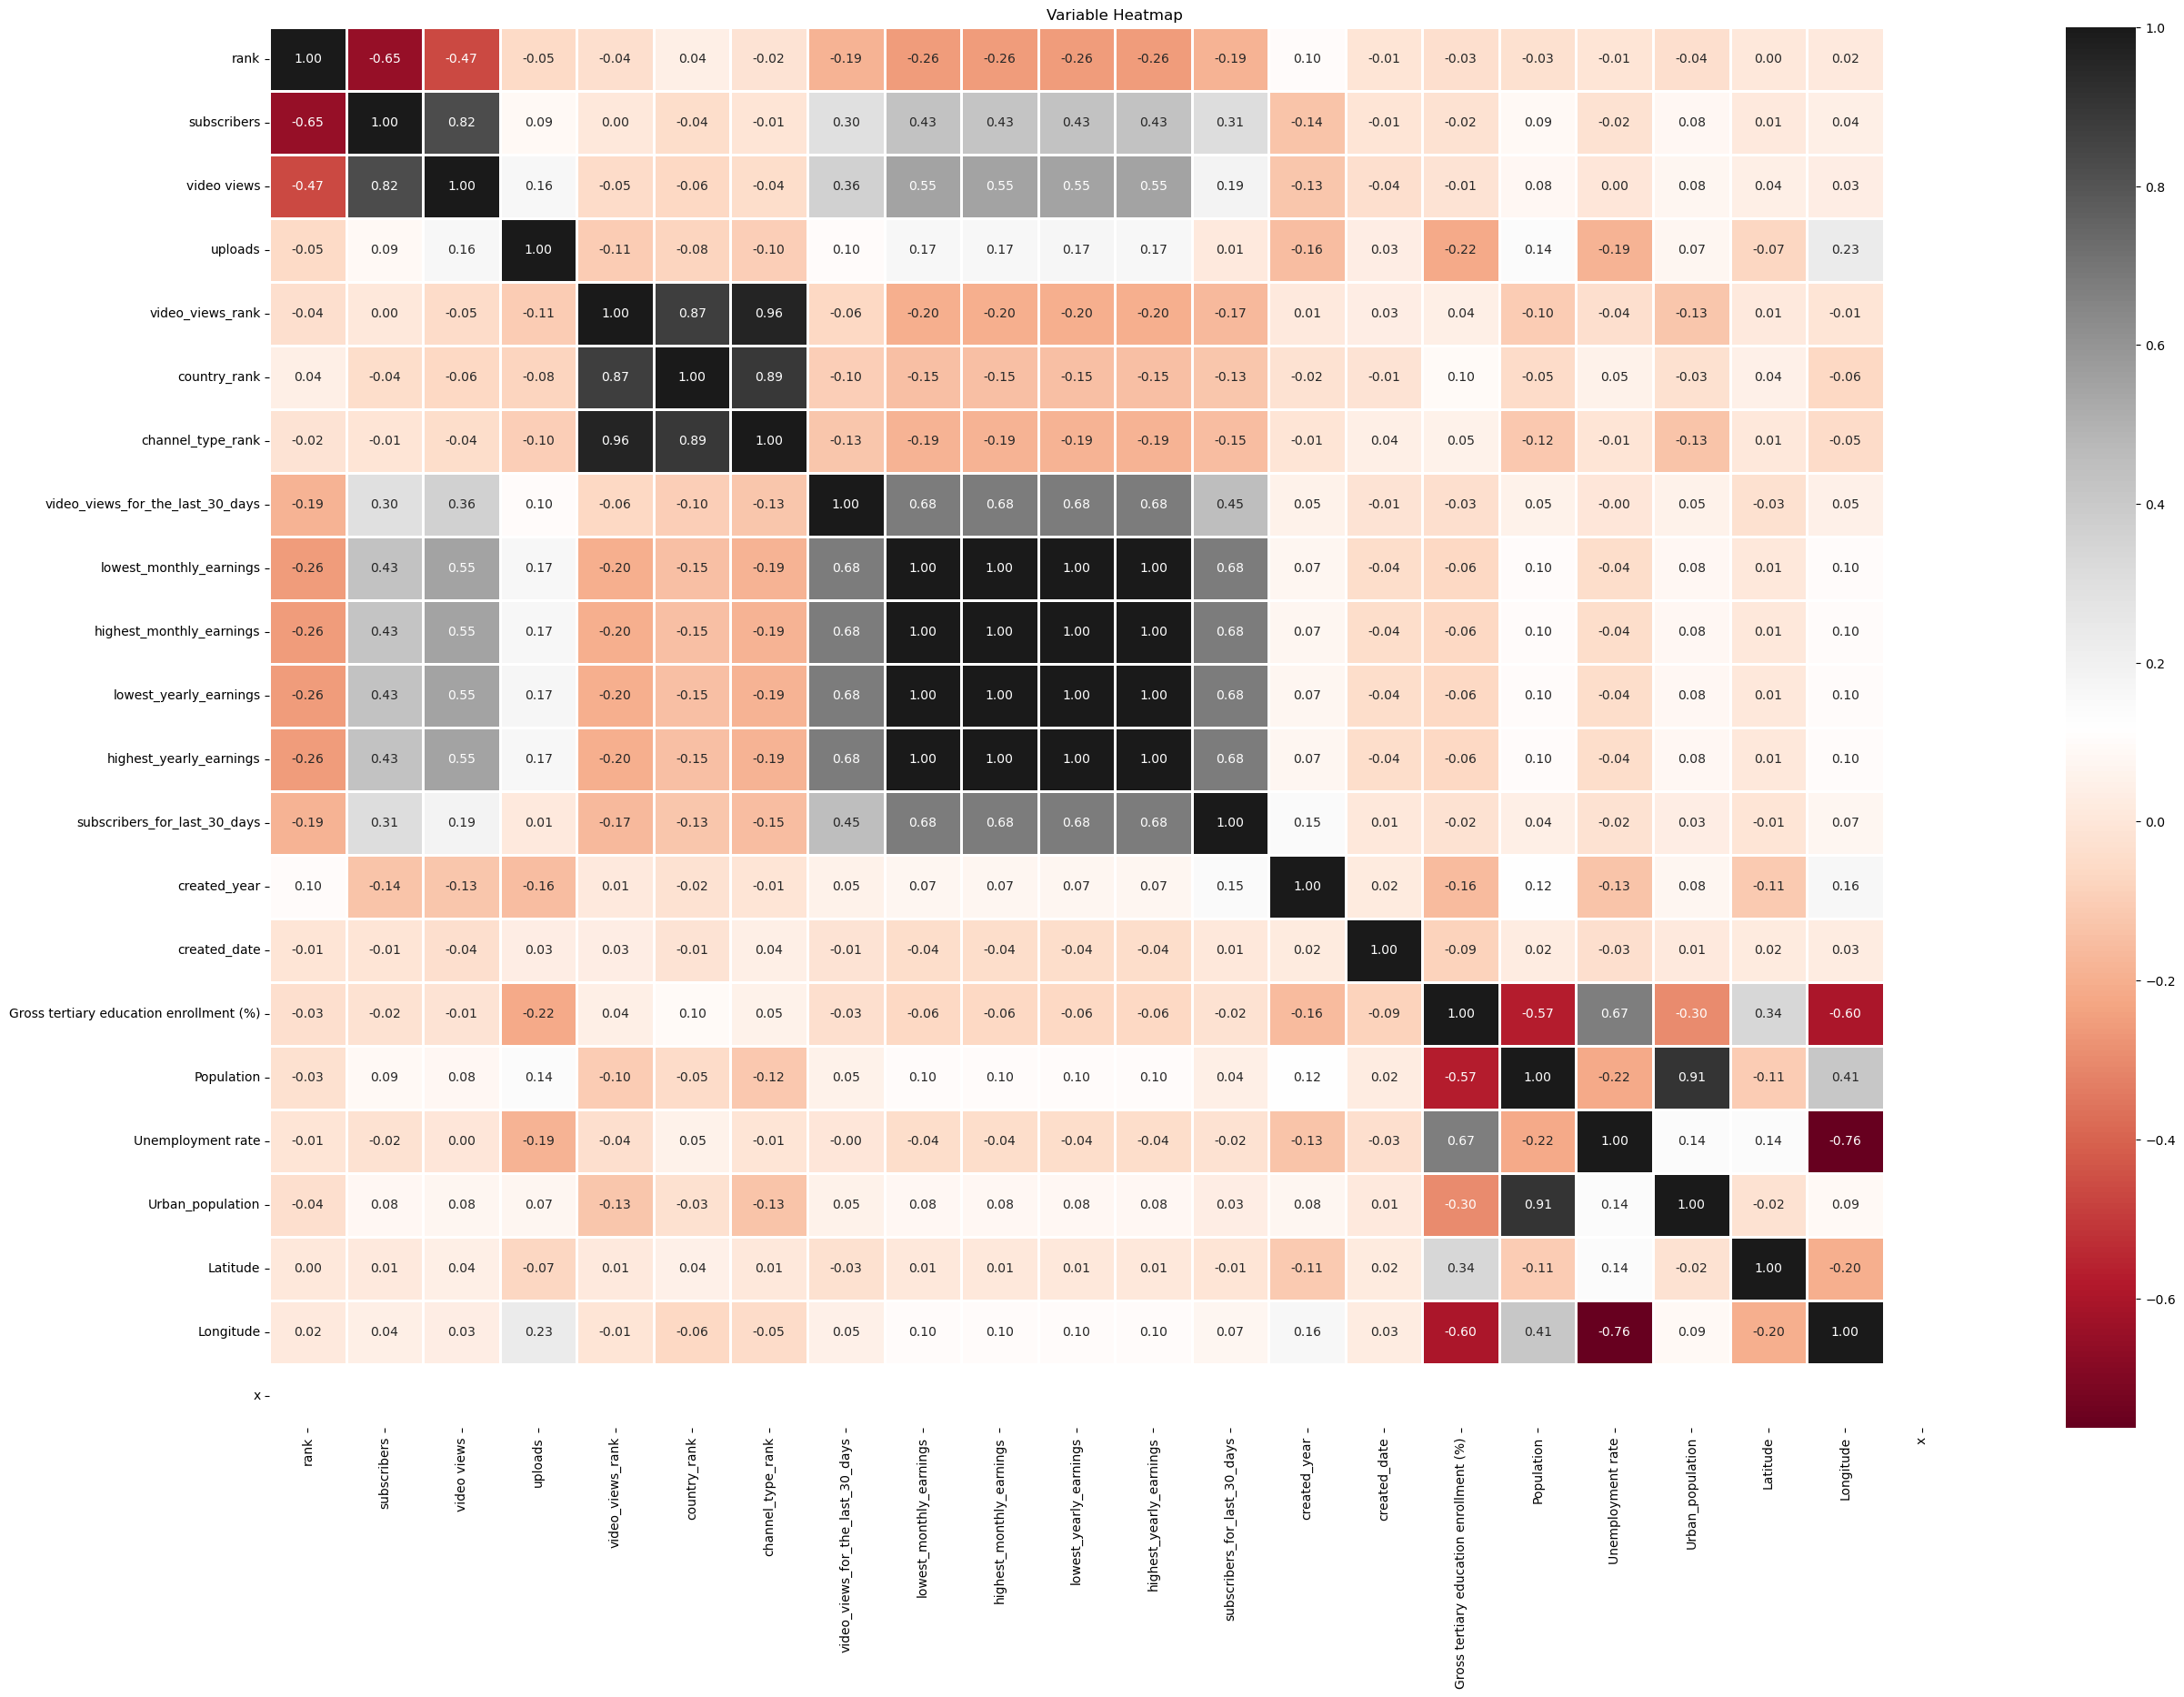

In [125]:
continuousdf = df.select_dtypes(include=['number'])  
correlation_matrix = continuousdf.corr()
plt.figure(figsize=(30,20))

sns.heatmap(correlation_matrix, annot=True, cmap='RdGy', fmt=".2f",linewidths=1)
plt.title('Variable Heatmap')
plt.show()

In [97]:
sub_country = df.groupby('Country').sum().sort_values(by=['subscribers'],ascending=False)
sub_country.head(10)

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_97684/139739729.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_country = df.groupby('Country').sum().sort_values(by=['subscribers'],ascending=False)


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,x
Country,,,,,,,,,,,,,,,,,,,,,,
United States,150984.0,7.084500e+09,3.690292e+12,1299605.0,68829154.0,153348.0,126564.0,5.362141e+10,11351605.11,1.816076e+08,1.360415e+08,2.179397e+09,68915203.0,623631.0,4623.0,27430.2,1.020825e+11,4571.70,8.417620e+10,11535.064640,-29766.709101,0.0
India,83531.0,4.333400e+09,2.299037e+12,3730053.0,17644342.0,37002.0,22688.0,3.974132e+10,9840719.25,1.572862e+08,1.179759e+08,1.889354e+09,59740000.0,340309.0,2711.0,4720.8,2.295582e+11,900.48,7.913330e+10,3459.738912,13265.763840,0.0
Brazil,36187.0,1.221800e+09,4.812090e+11,168178.0,4293900.0,6961.0,9950.0,1.383949e+10,1811314.00,2.884909e+07,2.177564e+07,3.478070e+08,7200000.0,122765.0,1010.0,3180.6,1.317868e+10,748.96,1.136098e+10,-882.570248,-3219.367360,0.0
United Kingdom,22111.0,9.174000e+08,4.305665e+11,86816.0,10830787.0,12581.0,19156.0,3.664467e+09,916087.48,1.464408e+07,1.100671e+07,1.759100e+08,4801130.0,86454.0,712.0,2580.0,2.873879e+09,165.55,2.404058e+09,2381.256193,-147.746839,0.0
Mexico,18527.0,6.269000e+08,1.982199e+11,33410.0,15009450.0,17159.0,23770.0,1.860700e+09,449684.00,7.218781e+06,5.388860e+06,8.625057e+07,3000000.0,66457.0,512.0,1326.6,4.158463e+09,112.86,3.386686e+09,779.938533,-3384.241872,0.0
Indonesia,14787.0,5.341000e+08,1.510107e+11,678321.0,4376602.0,4518.0,8471.0,4.742892e+09,612711.02,9.857800e+06,7.311100e+06,1.175791e+08,12400001.0,56424.0,486.0,1016.4,7.565710e+09,131.32,4.242272e+09,-22.099700,3189.797156,0.0
South Korea,8228.0,4.817000e+08,2.255917e+11,129724.0,32857.0,162.0,1240.0,6.773280e+09,1667442.00,2.662310e+07,1.996520e+07,3.202286e+08,7100000.0,34204.0,231.0,1603.1,8.790547e+08,70.55,7.158142e+08,610.431869,2172.037674,0.0
Russia,8218.0,4.072000e+08,2.329963e+11,19558.0,7689769.0,3415.0,6646.0,2.894754e+09,723602.00,1.157253e+07,8.660023e+06,1.387213e+08,5100010.0,32224.0,275.0,1310.4,2.309977e+09,73.44,1.722942e+09,984.384160,1685.100096,0.0
Thailand,8629.0,3.865000e+08,2.643180e+11,858953.0,4066125.0,4164.0,6847.0,1.711991e+09,412500.01,6.602600e+06,4.952200e+06,7.934850e+07,1800000.0,36199.0,230.0,887.4,1.253260e+09,13.50,6.353028e+08,285.660576,1817.865738,0.0
